## 

## Covid-19 Prediction

***A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources. The current dataset has been downloaded from ‘ABC’ government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome. Outcome variable is covid result test positive or negative. We have data from 11th March 2020 till 30th April 2020.***


## Features:

A. Basic information: 
1. ID (Individual ID)

2. Sex (male/female). 

3. Age ≥60 above years (true/false) 

4. Test date (date when tested for COVID)


B. Symptoms: 

5. Cough (true/false).

6. Fever (true/false). 

7. Sore throat (true/false). 

8. Shortness of breath (true/false). 

9. Headache (true/false). 


C. Other information: 

10. Known contact with an individual confirmed to have COVID-19 (true/false).


D. Covid report

11. Corona positive or negative

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [2]:
# Importing the dataset
covid_raw= pd.read_csv(r'E:\Data Analyst Journey\Odin SChool\Notes\EDA&ML\Projects\Covid Project\corona_tested_006.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_43100\408349258.py:2: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_raw= pd.read_csv(r'E:\Data Analyst Journey\Odin SChool\Notes\EDA&ML\Projects\Covid Project\corona_tested_006.csv')


In [3]:
## Chekcing for feature head
covid_raw.head(10)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
5,6,11-03-2020,True,False,False,False,False,other,NaN,NaN,Contact with confirmed
6,7,11-03-2020,False,False,False,False,False,negative,NaN,NaN,Other
7,8,11-03-2020,False,True,False,False,False,negative,NaN,NaN,Abroad
8,9,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
9,10,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad


In [4]:
covid_raw1 = covid_raw.copy()

In [5]:
covid_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


Here we can see that the dataset has mostly features of object datatype and one feature is of int datatype. ALl the features are of categorical in nature.

In [6]:
# Percentage of Data Missing
covid_raw.isnull().sum()*100/len(covid_raw)

Ind_ID                  0.000000
Test_date               0.000000
Cough_symptoms          0.090372
Fever                   0.090372
Sore_throat             0.000359
Shortness_of_breath     0.000359
Headache                0.000359
Corona                  0.000000
Age_60_above           45.659284
Sex                     7.015650
Known_contact           0.000000
dtype: float64

In [7]:
len(covid_raw)

278848

The total length of the dataset is 278848 rows.

We can see that Age_60_above has most missing values (45%).

There are couple of ways that we can implement to deal with this.

1.Deleting the rows (As the null values are almost 50% of the data so its not advisible to delete.)

2.Replace with most frequent values.(might result in imbalance dataset)

3.Apply classifier algorithm to predict


In [8]:
# Dropping unnecessary column
covid_raw.drop(columns='Test_date',inplace = True)

In [9]:
covid_raw

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,278844,False,False,False,False,False,positive,NaN,male,Other
278844,278845,False,False,False,False,False,negative,NaN,female,Other
278845,278846,False,False,False,False,False,negative,NaN,male,Other
278846,278847,False,False,False,False,False,negative,NaN,male,Other


In [10]:
#dropping NaN values from features
covid_raw.dropna(subset=['Fever'],inplace = True)
covid_raw.dropna(subset=['Sex'],inplace = True)
covid_raw.dropna(subset=['Cough_symptoms'],inplace = True)

In [11]:
covid_raw.isna().sum()

Ind_ID                      0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           120870
Sex                         0
Known_contact               0
dtype: int64

***As we can see, the "Age_60_above" feature includes 45% null values. As a result, I'm considering the idea of predicting the null values and replacing them with the predicted values using a classification machine learning algorithm.***

## Encoding 

In [12]:
## Before that we have to encode the features as all the features are categorical we are using binary encoding.
covid_raw['Cough_symptoms'] =[1 if x==True else  0 if x==False else x for x in covid_raw['Cough_symptoms']]
covid_raw['Fever'] = [1 if x==True else  0 if x==False else x for x in covid_raw['Fever']]
covid_raw['Sore_throat'] = [1 if x==True else  0 if x==False else x for x in covid_raw['Sore_throat']]
covid_raw['Shortness_of_breath'] =  [1 if x==True else  0 if x==False else x for x in covid_raw['Shortness_of_breath']]
covid_raw['Headache'] = [1 if x==True else  0 if x==False else x for x in covid_raw['Headache']]
covid_raw['Corona'] = [1 if x=='positive' else  0 if x=='negative' else 0 for x in covid_raw['Corona']]
covid_raw['Age_60_above'] = [1 if x=='Yes' else  0 if x=='No' else x for x in covid_raw['Age_60_above']]
covid_raw['Sex'] = [1 if x=='male' else  0 if x=='female' else x for x in covid_raw['Sex']]


In [13]:
#As multiple categories are there for 'Known_contact' feature I am considerring get_dummies function of pandas.
covid_raw = pd.get_dummies(covid_raw,prefix=['Known_contact'],columns=['Known_contact']).astype(int,errors='ignore')


## Now applying classifier algorithm to predict

In [14]:

from sklearn.linear_model import LogisticRegression
covid_raw.isna().sum()

Ind_ID                                       0
Cough_symptoms                               0
Fever                                        0
Sore_throat                                  0
Shortness_of_breath                          0
Headache                                     0
Corona                                       0
Age_60_above                            120870
Sex                                          0
Known_contact_Abroad                         0
Known_contact_Contact with confirmed         0
Known_contact_Other                          0
dtype: int64

In [15]:
#Rows having null values of 'Age_60_above' feature are stored in test_data
test_data = covid_raw[covid_raw['Age_60_above'].isnull()]


In [16]:
len(test_data)

120870

In [17]:
#Dropping the null values to have a non-null train data
covid_raw.dropna(inplace= True)
y_train=covid_raw['Age_60_above']

X_train = covid_raw.drop(['Age_60_above'],axis=1)
X_test= test_data.drop(['Age_60_above'],axis=1)


In [18]:
#Performing model training
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
#Predicting the values
X_test.dropna(inplace = True)
y_pred = model.predict(X_test)

In [20]:
# Here we can see length of predicted values are same as number of null values in the previous test_data
len(y_pred)

120870

In [21]:
#Adding the predicting values to the test_data
test_data['Age_60_above']=y_pred

C:\Users\ASUS\AppData\Local\Temp\ipykernel_43100\3063918967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Age_60_above']=y_pred


In [22]:
len(covid_raw)

138172

In [23]:
test_data

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact_Abroad,Known_contact_Contact with confirmed,Known_contact_Other
156040,156041,0,0,0,0,0,0,0.0,1,0,0,1
156041,156042,0,0,0,0,0,0,0.0,1,0,0,1
156042,156043,0,0,0,0,0,0,0.0,1,0,0,1
156043,156044,0,0,0,0,0,0,0.0,0,0,0,1
156044,156045,0,0,0,0,0,0,0.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,0,0,0,0,0,1,0.0,1,0,0,1
278844,278845,0,0,0,0,0,0,0.0,0,0,0,1
278845,278846,0,0,0,0,0,0,0.0,1,0,0,1
278846,278847,0,0,0,0,0,0,0.0,1,0,0,1


***Adding the test_data back to covid_raw data***

In [24]:
new_covid=pd.concat([covid_raw,test_data]).drop_duplicates()

In [25]:
len(new_covid)

259042

In [26]:
#checking for null values again
new_covid.isna().sum()

Ind_ID                                  0
Cough_symptoms                          0
Fever                                   0
Sore_throat                             0
Shortness_of_breath                     0
Headache                                0
Corona                                  0
Age_60_above                            0
Sex                                     0
Known_contact_Abroad                    0
Known_contact_Contact with confirmed    0
Known_contact_Other                     0
dtype: int64

In [27]:
new_covid.shape

(259042, 12)

In [28]:
new_covid.head(5)

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact_Abroad,Known_contact_Contact with confirmed,Known_contact_Other
13727,13728,1,0,0,0,0,0,0.0,1,1,0,0
13728,13729,1,0,0,0,0,0,0.0,0,1,0,0
13730,13731,1,1,0,0,0,1,1.0,0,0,0,1
13731,13732,0,0,0,0,0,0,0.0,0,0,0,1
13732,13733,0,0,0,0,0,0,0.0,0,0,0,1


## EDA

### Univariate Analysis

<Axes: xlabel='Corona', ylabel='count'>

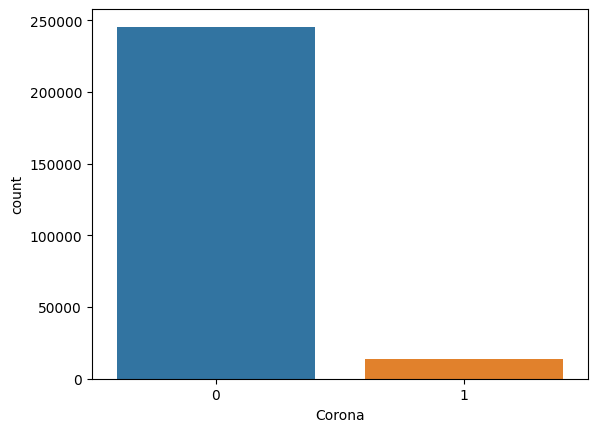

In [29]:
sns.countplot(x='Corona',data=new_covid)

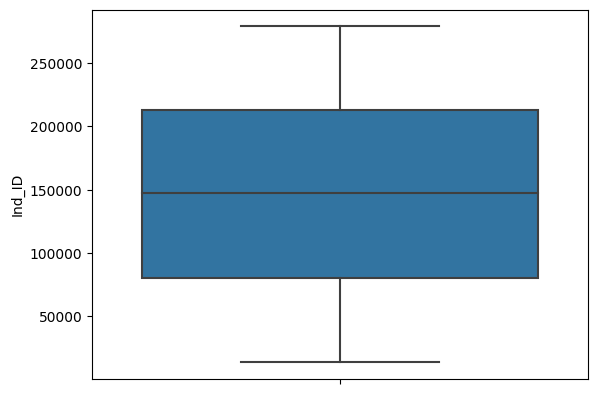

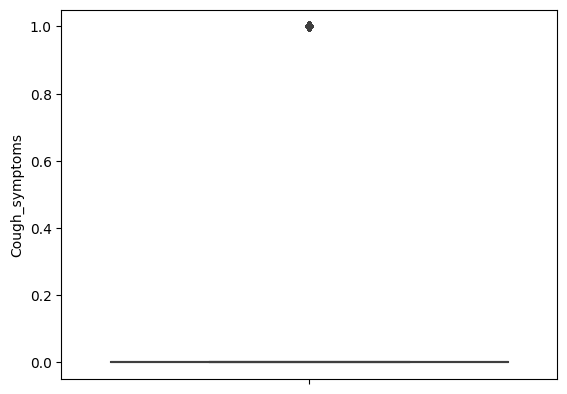

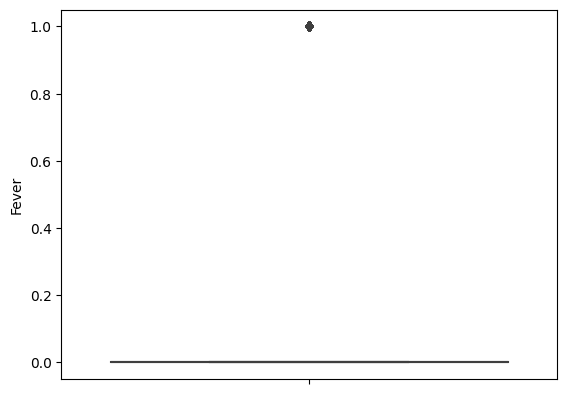

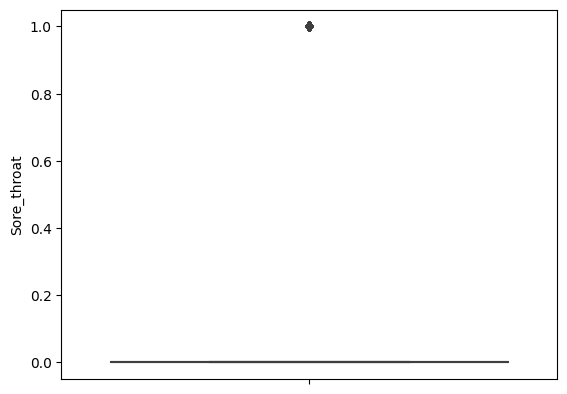

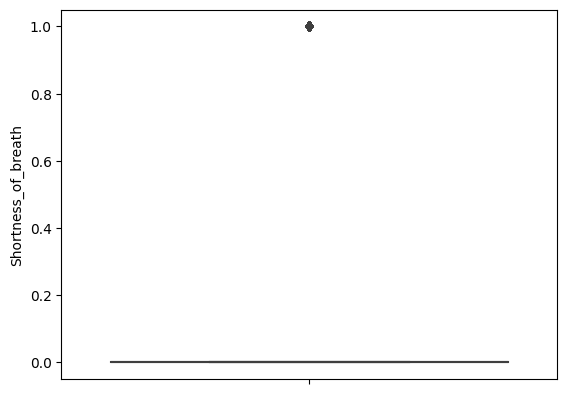

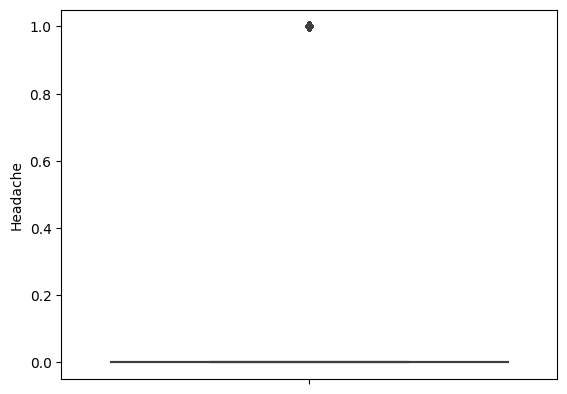

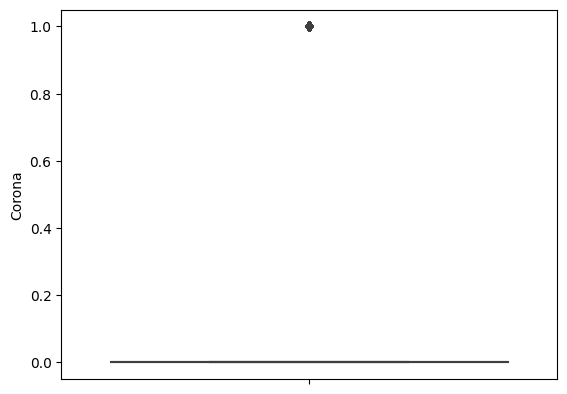

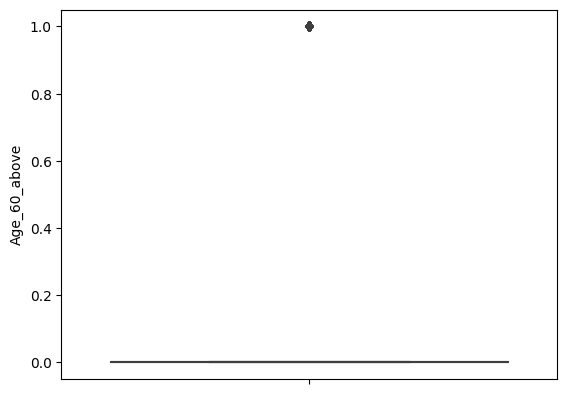

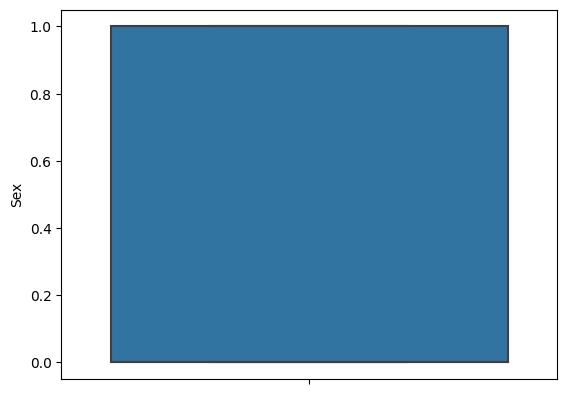

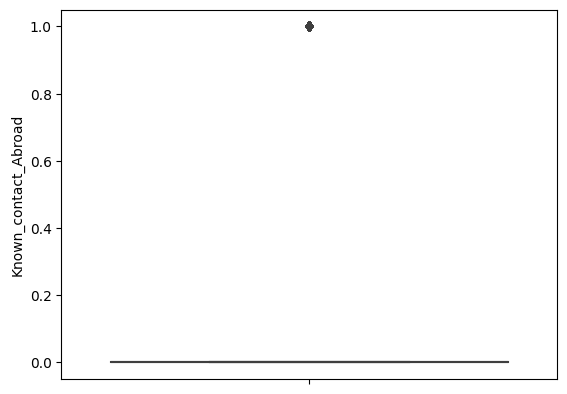

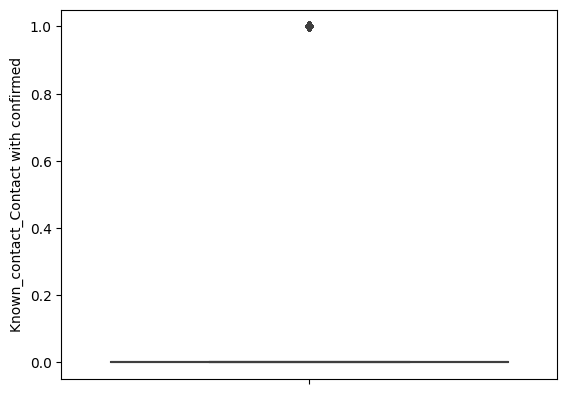

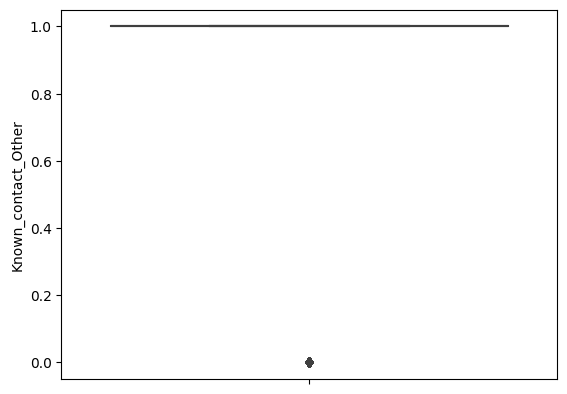

In [30]:
for i in new_covid.select_dtypes(np.number).columns:
    plt.figure()
    sns.boxplot(y=i,data=new_covid)

In [31]:
new_covid['Corona'].value_counts(normalize=True)

Corona
0    0.947761
1    0.052239
Name: proportion, dtype: float64

The Data is imbalanced. In order to have a accurate ML model we need to balance the dataset using undersampling or oversampling .



In [32]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


***Performing Multivariate Analysis***

<Axes: >

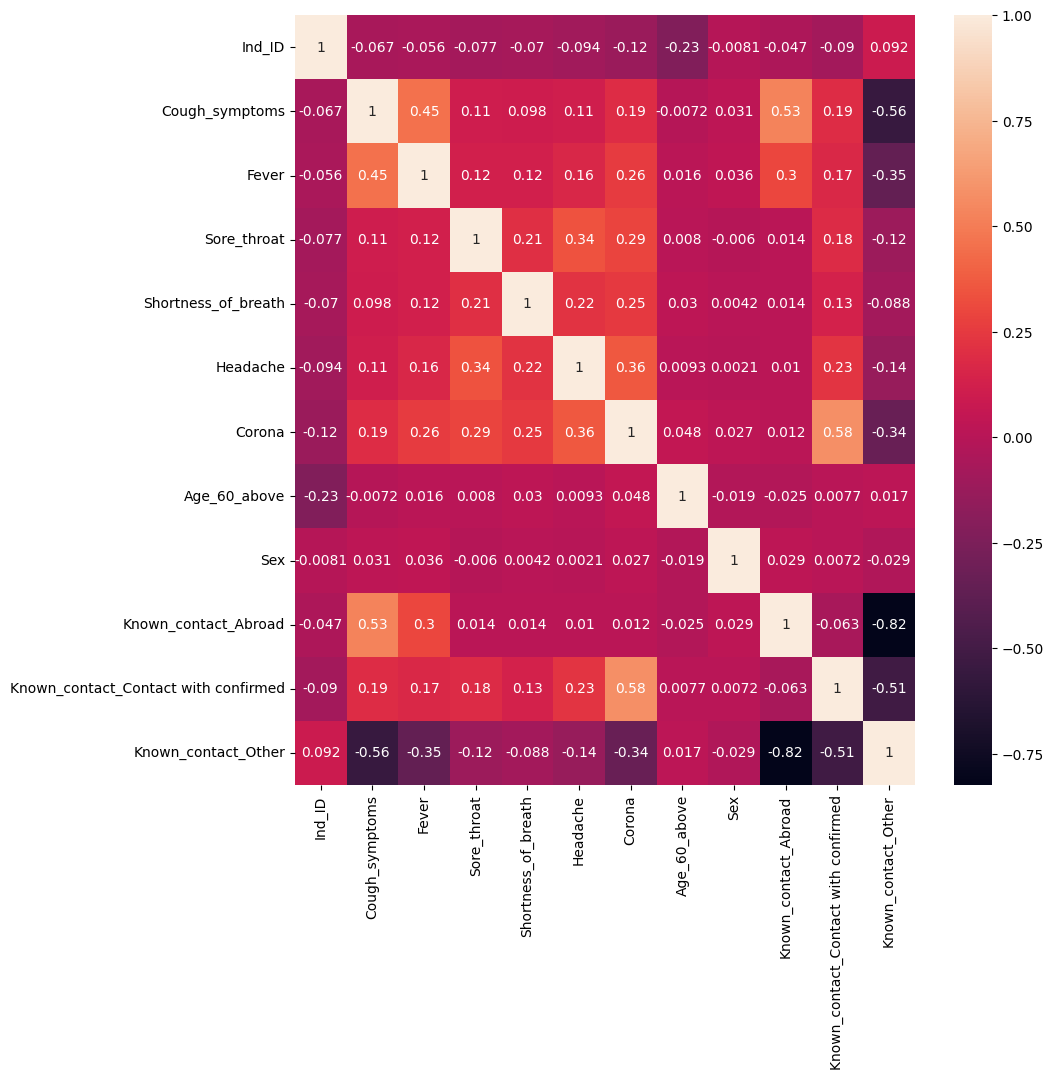

In [33]:
Correlated_covid=new_covid.corr()
fig,ax=plt.subplots(figsize=(10,10))

sns.heatmap(Correlated_covid,ax=ax,annot=True)

In [34]:
# Sorting the correlation values with respect to their relaton with the output column "Corona"
Correlated_covid_sorted=Correlated_covid.sort_values(by ='Corona',ascending=False)
Correlated_covid_sorted["Corona"][1:]

Known_contact_Contact with confirmed    0.577005
Headache                                0.364013
Sore_throat                             0.290776
Fever                                   0.257882
Shortness_of_breath                     0.245998
Cough_symptoms                          0.192372
Age_60_above                            0.047506
Sex                                     0.026635
Known_contact_Abroad                    0.011729
Ind_ID                                 -0.121320
Known_contact_Other                    -0.337571
Name: Corona, dtype: float64

It is to be noticed that the 5 features are having more positive effect on the output feature than others

***Known_contact_Contact with confirmed***

***Headache***


***Sore_throat***

***Fever***

***Shortness_of_Breath***

One feature is negatively correlated to the output column

***Known_contact_Other***

## Oversampling and then Undersampling the data 

In [35]:

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [36]:
new_covid.reset_index(inplace= True)

In [37]:
new_covid.drop(columns= 'index',inplace=True)

In [38]:
X=new_covid.drop(columns='Corona')
y=new_covid['Corona']

In [39]:
print(f'The Shape of X:{X.shape} ')
print(f'The Shape of  Y:{y.shape} ')

The Shape of X:(259042, 11) 
The Shape of  Y:(259042,) 


In [40]:
print(Counter (y))

Counter({0: 245510, 1: 13532})


***Instead of considering only oversampling or undesampling individually  we are considering both here.
The concept is that we can apply modest amount of oversampling to the minority class, which improves the bias to the minority class examples, whilst we also perform a modest amount of undersampling on the majority class to reduce the biass on the majority class examples.***

In [41]:
# Instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
#first performing oversampling to minority class
X_over, y_over = over.fit_resample(X,y)
print(f"Oversampled: {Counter(y_over)}")


Oversampled: Counter({0: 245510, 1: 122755})


In [42]:
# Now to coombine under sampling
X_combined_sampling,y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined random sampling:{Counter(y_combined_sampling)}")

Combined random sampling:Counter({0: 153443, 1: 122755})


## Modeling 

Now we have our split data in input and output manner which we can use for modeling.
Here we will be using classification models as the output model has 1s and 0s as result.

***Supervised Classification Models:***

1.Logistic Regression

2.Decision Tree

3.Random Forest

4.K-Nearest Models

## Train and Test Split of Data

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X_combined_sampling,y_combined_sampling,test_size = 0.3,random_state=42)

## 1.Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [46]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
Y_pred_lr=LR.predict(X_test)

In [47]:
print(f"The accuracy score for Logistic Regression Model is : {round(accuracy_score(y_test,Y_pred_lr)*100,2)} %")

The accuracy score for Logistic Regression Model is : 83.93 %


#  2.Decision Tree

In [48]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [49]:
# Now for train and test split we can use the same X_train,X_test,y_train,y_test data
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test) 
print(f"The accuracy score for Decision Tree Model is : {round(accuracy_score(y_test,Y_pred_dt)*100,2)} %")

The accuracy score for Decision Tree Model is : 97.89 %


# 3.Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(f"The accuracy score for Random Forest Model is : {round(accuracy_score(y_test,y_pred_rf)*100,2)} %")

The accuracy score for Random Forest Model is : 97.81 %


# 4.K-Nearest Models

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print(f"The accuracy score for Random Forest Model is : {round(accuracy_score(y_test,y_pred_knn)*100,2)} %")

The accuracy score for Random Forest Model is : 84.4 %


Now to decide the K value we need to define a recursive function which will help in testing differnt K-values for the model and plot the accuracy result.

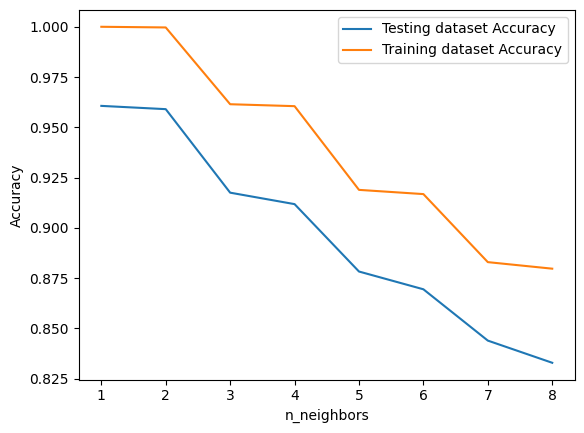

In [59]:
neighbors=np.arange(1,9)
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn1 = KNeighborsClassifier(n_neighbors=k) 
    knn1.fit(X_train, y_train) 
      
    # Compute training and test data accuracy 
    train_accuracy[i] = knn1.score(X_train, y_train) 
    test_accuracy[i] = knn1.score(X_test, y_test) 
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 